### DECISION TREE

## Mais de duas técnicas 
Para melhorar os resultados, implementamos diferentes técnicas de classificação para podermos compará-las.  

# <font color='#00878A'>DECISION TREE</font>

Vamos implementar agora uma técnica chamada Decision Tree. Ela é utilizada para classificadores e regressões, no nosso caso classificação. O objetivo do uso da Decision Tree é criar um modelo que fará uma predição baseado em uma classifição de várias classes.


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib 
from sklearn.metrics import accuracy_score

In [2]:
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [3]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])

In [4]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

In [5]:
x_train_encoded

<6499x10952 sparse matrix of type '<class 'numpy.float64'>'
	with 181972 stored elements in Compressed Sparse Row format>

In [6]:
#implementando a técnica decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_encoded, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [7]:
dados_testes.dropna(inplace=True)

In [8]:
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

In [9]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [10]:
y_pred = regressor.predict(x_test_encoded)

In [11]:
########### regressor.score(x_test_encoded, y_test)

In [12]:
y_pred

array([1., 1., 0., ..., 1., 0., 0.])

In [13]:
acc = accuracy_score(y_test, y_pred)

In [14]:
print("Acurácia: {}".format(acc))

Acurácia: 0.5869175627240143


Agora que nosso modelo está treinado, podemos plottar a "árvore de decisões":

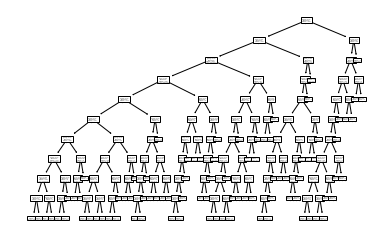

In [41]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(x_train_encoded, y_train)
tree.plot_tree(clf.fit(x_train_encoded, y_train)) ;

In [16]:
x_train_encoded

<6499x10952 sparse matrix of type '<class 'numpy.float64'>'
	with 181972 stored elements in Compressed Sparse Row format>

In [17]:
tree.export_graphviz(clf,out_file="teste.dot")

In [18]:
df=pd.DataFrame({'Real':y_test, 'Previsão':y_pred})
df

,Real,Previsão
0,1,1.0
1,1,1.0
2,0,0.0
3,1,1.0
4,0,0.0
5,1,0.0
6,1,0.0
7,1,0.0
8,1,0.0
9,1,0.0


### DECISION TREE COM DADOS CONCATENADOS

In [19]:
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']

dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

dados_concat = pd.concat([dados_b, dados_r]).dropna()

In [20]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head()

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,1,GCU,Solo,Shen,Santorin,JarvanIV,Fly,Orianna,Rikara,Sivir,Whyin,Thresh
1,1,CNB,Lep,Maokai,Minerva,Graves,Tinowns,Syndra,pbO,Jhin,Woswos,Malzahar
2,0,MSE,Ninuo,Maokai,Wulala,Gragas,M1ssion,Vladimir,CorGi,Sivir,Kaiwing,Braum
3,1,PDS,jer0m,Gnar,RafaL0L,Gragas,Icytower,Vladimir,xpng,Varus,Choisix,Thresh
4,0,JAG,TrAce,TahmKench,Winged,Elise,Kuzan,Cassiopeia,Pilot,Lucian,Chei,Alistar


In [21]:
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [22]:
y_train2 = dados_concat['Result']
x_train2 = dados_concat.drop(columns='Result')

In [23]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded2 = encoder.fit_transform(x_train2.astype(str).values)

In [24]:
regressor2 = DecisionTreeRegressor()
regressor2.fit(x_train_encoded2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
x_train_encoded2

<12933x2306 sparse matrix of type '<class 'numpy.float64'>'
	with 142263 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train_encoded2, y_train2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
dados_testes.dropna(inplace=True)

In [28]:
y_test2 = teste_concat['Result']
x_test2 = teste_concat.drop(columns=['Result'])

In [29]:
x_test_encoded2 = encoder.transform(x_test2.astype(str).values)
y_pred2 = regressor2.predict(x_test_encoded2)

In [30]:
regressor2.score(x_test_encoded2, y_test2)
y_pred2

array([1., 0., 1., ..., 0., 1., 0.])

In [31]:
y_pred2

array([1., 0., 1., ..., 0., 1., 0.])

In [32]:
y_test2

0       1
1       1
2       0
3       1
4       0
5       1
6       1
7       1
8       1
9       1
10      0
11      1
12      0
13      0
14      0
15      1
16      0
17      1
18      1
19      1
20      1
21      1
22      1
23      0
24      0
25      1
26      0
27      1
28      0
29      0
       ..
1090    0
1091    0
1092    0
1093    0
1094    1
1095    1
1096    0
1097    0
1098    0
1099    1
1100    1
1101    1
1102    1
1103    1
1104    0
1105    1
1106    0
1107    0
1108    0
1109    1
1110    1
1111    0
1112    1
1113    0
1114    1
1115    1
1116    0
1118    1
1119    1
1120    1
Name: Result, Length: 2232, dtype: int64

In [33]:
y_test2=list(map(int, y_test2))
y_pred2=list(map(int, y_pred2))

In [34]:
acc = accuracy_score(y_test2, y_pred2)

In [35]:
print("Acurácia: {0}".format(acc))

Acurácia: 0.5533154121863799


In [36]:
df2=pd.DataFrame({'Real':y_test2, 'Previsão':y_pred2})
df2

,Real,Previsão
0,1,1
1,1,0
2,0,1
3,1,1
4,0,0
5,1,1
6,1,0
7,1,1
8,1,1
9,1,0


# ALEATÒRIO

In [37]:
#####################
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.41308243727598565
Mean Squared Error: 0.41308243727598565
Root Mean Squared Error: 0.6427148957943838


### DUMMIFY

Primeiramente utilizamos a função duymmify para converter as variáveis categóricas em quantitativas, porém 
Ao invés de utilizar a função dummify, optamos por utilizar o OneHotEncoder.

EXPLICAR O PORQUE

In [38]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [39]:
d = dummify(dados_concat, 'Top')
colunas = ['TeamTag','TopChamp','Jungle','JungleChamp','Middle','MiddleChamp','ADC','ADCChamp','Support','SupportChamp']
for i in colunas:
    d= dummify(d,i)
    
d.head()

,Result,Top_957,Top_3z,Top_ADD,Top_AJ,Top_AJun,Top_Acce,Top_Achie,Top_Acorn,Top_Air,...,SupportChamp_Trundle,SupportChamp_TwistedFate,SupportChamp_Udyr,SupportChamp_Vayne,SupportChamp_Veigar,SupportChamp_Velkoz,SupportChamp_Zac,SupportChamp_Ziggs,SupportChamp_Zilean,SupportChamp_Zyra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
t = dummify(teste_concat, 'Top')
colunas = ['TeamTag','TopChamp','Jungle','JungleChamp','Middle','MiddleChamp','ADC','ADCChamp','Support','SupportChamp']
for i in colunas:
    t= dummify(t,i)
    
t.head()

,Result,Top_957,Top_3z,Top_957',Top_ADD,Top_AJ,Top_AJun,Top_Acce,Top_Achie,Top_Acorn,...,SupportChamp_Soraka,SupportChamp_Syndra,SupportChamp_TahmKench,SupportChamp_Taric,SupportChamp_Thresh,SupportChamp_Trundle,SupportChamp_Veigar,SupportChamp_Velkoz,SupportChamp_Zilean,SupportChamp_Zyra
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
